# Prototyping Notebook
In the following notebook a simple linear trading strategy is implemented using the Kraken API to retrive the data.
In order to implement this strategy we'll need the following libraries:

In [68]:
#Import the libraries
import krakenex
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from statsmodels.tsa.stattools import adfuller

The first thing to do is set a stationary process and see whether the strategy works in general. We add a mean of 5000 in order to make it more comparable to the Bitcoin quotation at the time of the notebook, plus we're avoiding negative number that has no significant meaning in currency pairs. Then we use the ADF test to loo for stationarity which indeed the process under scope is.

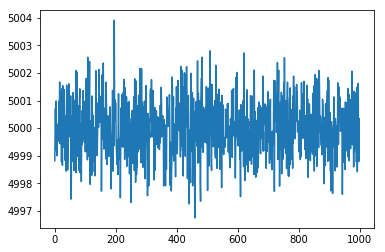

(-12.902168845254577,
 4.225630414677945e-24,
 4,
 994,
 {'1%': -3.43694584277544,
  '5%': -2.8644520725172873,
  '10%': -2.5683205291305176},
 2.2617545518493154)

In [69]:
process = np.random.randn(999) + 5000
plt.plot(process)
plt.show()
adfuller(process, autolag = 't-stat')

Now that we assured that our dummy process is indeed stationary along all its path we can split in into two different series the training and the testing one.

In [72]:
testing = process[0:200]
training = process[201:999]

In [73]:
l =199
i = l
for i in range(l,999):
    print ("We're on time %d" % (i))
    adf = adfuller(testing[(i-l):i])
    if (adf[0]<= -3 and adf[1] <= 0.05):
        mu = testing[i-adf[2]:i].mean()
        std = testing[i-adf[2]:i].std()
        h = (-1)*((testing[i] - mu)/std)
        h = h/3
        print ("The series is stationary with result: %d p-value of %d Horizon %d" % (adf[0],(adf[1]),(adf[2])))
        nex = i-l
        testing = np.append(testing,training[nex])

We're on time 199
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 200
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 201
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 202
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 203
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 204
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 205
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 206
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 207
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 208
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 209
The series is stationary with result: -10 p-value of 0 Horizon 1
We're on time 210
The series is stationary with result: -10 p-value of 0 Horizon 1
We'r

/home/mrepetto94/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/mrepetto94/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/home/mrepetto94/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mrepetto94/.local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/mrepetto94/.local/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/mrepetto94/.local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 217
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 218
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 219
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 220
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 221
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 222
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 223
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 224
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 225
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 226
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 227
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 228
The 

The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 324
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 325
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 326
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 327
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 328
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 329
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 330
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 331
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 332
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 333
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 334
The series is stationary with result: -12 p-value of 0 Horizon 0
We're on time 335
The 

The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 435
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 436
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 437
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 438
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 439
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 440
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 441
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 442
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 443
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 444
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 445
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 446
The 

The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 542
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 543
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 544
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 545
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 546
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 547
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 548
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 549
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 550
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 551
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 552
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 553
The 

The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 659
The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 660
The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 661
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 662
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 663
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 664
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 665
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 666
The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 667
The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 668
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 669
The series is stationary with result: -11 p-value of 0 Horizon 1
We're on time 670
The 

The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 763
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 764
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 765
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 766
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 767
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 768
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 769
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 770
The series is stationary with result: -13 p-value of 0 Horizon 0
We're on time 771
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 772
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 773
The series is stationary with result: -14 p-value of 0 Horizon 0
We're on time 774
The 

The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 863
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 864
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 865
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 866
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 867
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 868
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 869
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 870
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 871
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 872
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 873
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 874
The 

The series is stationary with result: -8 p-value of 0 Horizon 1
We're on time 975
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 976
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 977
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 978
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 979
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 980
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 981
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 982
The series is stationary with result: -9 p-value of 0 Horizon 1
We're on time 983
The series is stationary with result: -4 p-value of 0 Horizon 4
We're on time 984
The series is stationary with result: -4 p-value of 0 Horizon 4
We're on time 985
The series is stationary with result: -15 p-value of 0 Horizon 0
We're on time 986
The series is

IndexError: index 798 is out of bounds for axis 0 with size 798

In [59]:
np.append(testing,2)

array([5.00118922e+03, 5.00032008e+03, 4.99861771e+03, 4.99898145e+03,
       5.00181777e+03, 5.00008968e+03, 5.00198127e+03, 4.99885335e+03,
       5.00009827e+03, 4.99946801e+03, 4.99858798e+03, 4.99931349e+03,
       4.99972491e+03, 5.00016244e+03, 4.99924076e+03, 5.00131472e+03,
       4.99816539e+03, 5.00106906e+03, 4.99893734e+03, 5.00012499e+03,
       5.00071787e+03, 5.00026828e+03, 5.00061547e+03, 4.99918992e+03,
       5.00039881e+03, 5.00088188e+03, 5.00041712e+03, 4.99947024e+03,
       4.99913920e+03, 5.00092577e+03, 4.99901659e+03, 4.99935297e+03,
       4.99969278e+03, 5.00239646e+03, 4.99952335e+03, 4.99967190e+03,
       4.99949845e+03, 4.99937869e+03, 5.00117894e+03, 4.99851436e+03,
       5.00102445e+03, 4.99965308e+03, 4.99973507e+03, 5.00078500e+03,
       4.99901395e+03, 5.00040134e+03, 4.99950479e+03, 5.00183194e+03,
       5.00212744e+03, 4.99888734e+03, 4.99980282e+03, 4.99905914e+03,
       4.99945003e+03, 4.99904978e+03, 5.00048171e+03, 4.99970126e+03,
      

In [60]:
testing

array([5001.18921773, 5000.32007931, 4998.61770934, 4998.98144787,
       5001.81777092, 5000.08967782, 5001.98126955, 4998.85335258,
       5000.09826614, 4999.46800641, 4998.58798488, 4999.31349407,
       4999.72491025, 5000.16243908, 4999.24075644, 5001.31472332,
       4998.16538897, 5001.06906458, 4998.93733653, 5000.12498505,
       5000.7178748 , 5000.26828346, 5000.61547382, 4999.18991748,
       5000.39881303, 5000.88187799, 5000.41712408, 4999.47024119,
       4999.13919653, 5000.92577205, 4999.0165899 , 4999.35296718,
       4999.69278047, 5002.39645527, 4999.52334993, 4999.67190199,
       4999.49845111, 4999.37869055, 5001.17893788, 4998.51436125,
       5001.02445157, 4999.6530827 , 4999.73507014, 5000.78499633,
       4999.01395113, 5000.40134364, 4999.50479092, 5001.83194337,
       5002.12744471, 4998.88734449, 4999.8028155 , 4999.05913658,
       4999.45002801, 4999.04977774, 5000.48170969, 4999.70125677,
       5000.6276828 , 4997.74431381, 5001.60326306, 4999.20210

In [27]:
pair = 'XBTEUR'

k = krakenex.API(key=os.environ['KRAKENKEY'],
                 secret=os.environ['KRAKENSECRET'])

ret = k.query_public('Trades', data = {'pair': pair})

ret = ret['result']['XXBTZEUR']

df = pd.DataFrame(ret,
                  columns = ['Price', 'Volume', 'Time', 'BS', 'ML', 'Misc'])

df.Price = pd.to_numeric(df.Price)
df.Time = pd.to_datetime(df.Time, unit ='s')

#split the df in training and testing
df_training =df.iloc[:799,:]
df_testing = df.iloc[800:,:]

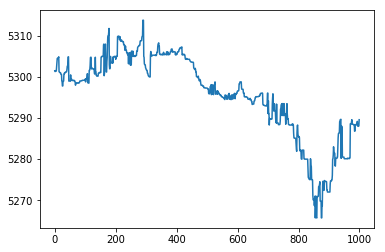

In [28]:
plt.plot(df.Price)
plt.show()

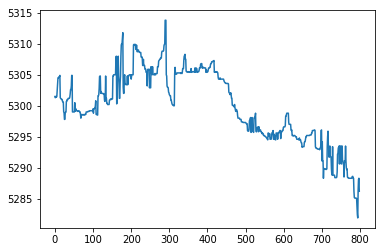

In [29]:
plt.plot(df_training.Price)
plt.show()

In [31]:
###Backtesting###

adfuller(df_training.Price[150:400], autolag = 't-stat')

(-3.9993466522237964,
 0.001413936240156192,
 12,
 237,
 {'1%': -3.4582467982399105,
  '5%': -2.8738137461081323,
  '10%': -2.5733111490323846},
 2.00314808540049)

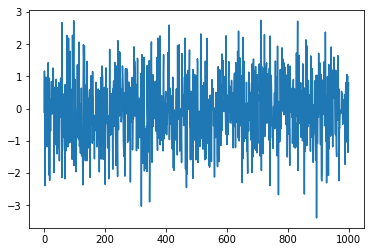

(-6.16069429133432,
 7.186137490430904e-08,
 20,
 979,
 {'1%': -3.4370471695043037,
  '5%': -2.8644967585264784,
  '10%': -2.5683443301882956},
 2.0687721877729235)

In [4]:
#Calculate the hedgeratio
df["HedgeRatio"] =  (df.Price -df.Price.mean())/df.Price.std()
df.HedgeRatio = df.HedgeRatio / max(abs(df.HedgeRatio))
df.HedgeRatio = (-1) * df.HedgeRatio

i = 0
portfolio = [1,0]
pnl = []
while i <= 998:
    if df.HedgeRatio[i] >= 0 :
        portfolio[1] = portfolio[1] + ((portfolio[0]/df.Price[i])*df.HedgeRatio[i])
        portfolio[0] = portfolio[0] * (1-df.HedgeRatio[i])
    else:
        portfolio[0] = portfolio [0] + ((portfolio[1]*df.Price[i])*(abs(df.HedgeRatio[1])))
        portfolio[1] = portfolio[1] * (1-abs(df.HedgeRatio[i]))
    pnl.append(portfolio[0] + portfolio[1]*df.Price[i])
    i+=1



###Backtesting a random strategy###

In [8]:
portfolio

[404.4079919538534, 6.333018083190077e-118]